<a href="https://colab.research.google.com/github/Teshimoz/TED_project/blob/main/TED_project_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy.stats import pearsonr
import re

In [2]:
# after all work for better readability we can do this
# import warnings
# warnings.filterwarnings('ignore')

# 1. Explore data

#### 1.0 General exploration

In [4]:
#import local data - TED – Ultimate Dataset from
# https://www.kaggle.com/miguelcorraljr/ted-ultimate-dataset
teds = pd.read_csv('ted_talks_en.csv')

In [5]:
# exploring data
teds.head(3)
# teds[teds.event.str.contains('TED@')]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [6]:
# teds.info()
# teds.describe()

In [7]:
teds.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [8]:
# check nulls
print(teds.isnull().sum().sum())
teds.isnull().sum()

1685


talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [9]:
# which languages are in set
teds.native_lang.nunique()
teds.native_lang.unique()
print('English prevails as a native language')
teds['native_lang'].value_counts()

English prevails as a native language


en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

#### 1.1 Explore teds by occupation of lectors

In [10]:
teds.occupations.head()

0                        {0: ['climate advocate']}
1    {0: ['global health expert; data visionary']}
2                    {0: ['technology columnist']}
3      {0: ['activist for environmental justice']}
4                      {0: ['author', 'educator']}
Name: occupations, dtype: object

There is a list of different occupancies for every lector, will try to simplify this from list to one tag

In [11]:
# lectors of which occupations are in set
teds.occupations.unique()
print(teds.occupations.nunique(), 'unique occupation descriptions (lists of tags) in set of', len(teds), 'speeches')
occupations_list = list(teds.occupations.dropna())
# print(len(occupations_list), 'list length before flattening')
occupations_list_flat = []
for occup in occupations_list:
    occup = occup.split(': ')[-1]
    occup = re.sub(r'}', '', occup)
    occup = re.sub(r'\'', '', occup)
    occup = re.sub(r'\[', '', occup)
    occup = re.sub(r'\]', '', occup)
    occup = re.split(', |; ', occup)
    for part in occup:
        occupations_list_flat.append(part)

occupations_list_flat = pd.Series(occupations_list_flat)
# occupations_list_flat.nunique()
# print(len(occupations_list_flat), 'listed occupations including recurrences')
print(occupations_list_flat.nunique(), 'unique occupations after simplification, a lot of unique tags')
print('This list still is too long to categorize all speeches by lector occupancy')
print('\nLet\'s look at first 20 popular occupation tags:')
occupations_list_flat = [x.capitalize() for x in occupations_list_flat]
occupations_list_flat_df = pd.DataFrame(occupations_list_flat).rename(columns = {0:'occupation'})
shortlist_occupations = occupations_list_flat_df['occupation'].value_counts().head(20)
print(shortlist_occupations)

2049 unique occupation descriptions (lists of tags) in set of 4005 speeches
1763 unique occupations after simplification, a lot of unique tags
This list still is too long to categorize all speeches by lector occupancy

Let's look at first 20 popular occupation tags:
Author                 155
Writer                 138
Entrepreneur           100
Artist                  88
Journalist              81
Activist                79
Designer                68
Educator                67
Inventor                59
Architect               47
Neuroscientist          47
Psychologist            46
Filmmaker               37
Economist               37
Physicist               34
Philosopher             31
Musician                31
Photographer            31
Biologist               27
Social entrepreneur     25
Name: occupation, dtype: int64


In [12]:
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

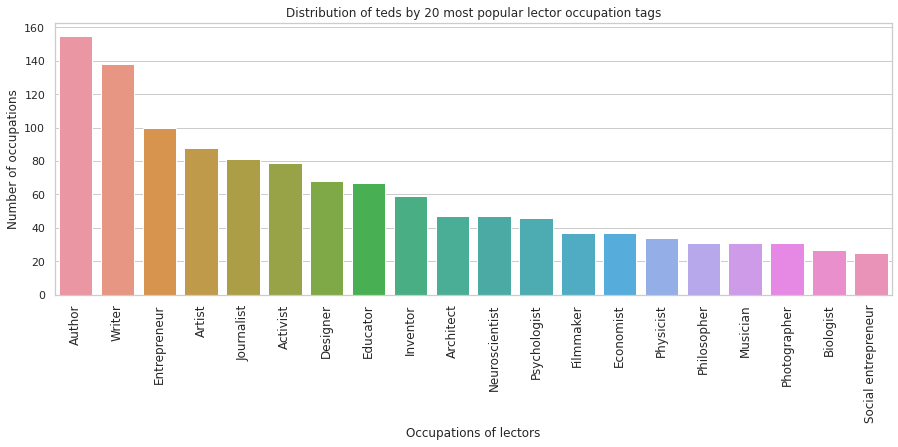

In [13]:
# barplot of popular occupations
plt.subplots(figsize=(15,5))
sns.barplot(x=shortlist_occupations.index, y=shortlist_occupations)
plt.xticks(rotation=90)
plt.title('Distribution of teds by 20 most popular lector occupation tags')
plt.xlabel('Occupations of lectors')
plt.ylabel('Number of occupations')
plt.xticks(fontsize=12)
plt.show()

#### 1.2 Explore teds by topics; filter to get shorter list

In [14]:
print('We can see that teds are labeled by list of topics, \nit could be useful to get simplified table with one topic for each ted speech')
teds.topics.head()

We can see that teds are labeled by list of topics, 
it could be useful to get simplified table with one topic for each ted speech


0    ['alternative energy', 'cars', 'climate change...
1    ['Africa', 'Asia', 'Google', 'demo', 'economic...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['children', 'creativity', 'culture', 'dance',...
Name: topics, dtype: object

In [15]:
# pre-clean of topics by removing some topics from description in dataframe:
# non-relevant values, like 'TEDx', 'TED-Ed'
teds['topics'] = teds['topics'].str.replace('TED Fellows|TEDx|TED-Ed','',regex=True)#TEDx|TED-Ed|science|technology|
# check topics in set
print(teds.topics.nunique(), 'unique topic descriptions in set of', len(teds))
# teds.topics#.nunique()
topics_list = list(teds.topics)

def clean_topic(topic):
    topic = re.sub(r'\', \'', ',', topic)
    topic = re.sub(r'\[\'', ',', topic)
    topic = re.sub(r'\'\]', '', topic)
    topic = topic.split(',')
    return topic

topics_list_flat = []
for topic in topics_list:
    topic = clean_topic(topic)
    for part in topic:
        topics_list_flat.append(part)

# create stop-list to remove non-relevant or too dominating{general} values, like 'science', 'technology' or 'TEDx', 'TED-Ed'
# stop_list = ['TEDx', 'TED-Ed', 'science', 'technology']#, 'culture', 'global issues']
# topics_list_flat = [i for i in topics_list_flat if i not in stop_list]        
        
# remove zero-length elements        
topics_list_flat = [i for i in topics_list_flat if len(i) != 0]
print(len(topics_list_flat), 'topic names, including recurrences')
topics_list_flat = pd.Series(topics_list_flat)
print(topics_list_flat.nunique(),'unique topic names, it\'s pretty long list')
print('Further we will check how many unique topics(categories) \nstill describe significant part of speeches')
# print(type(topics_list_flat))
topics_list_flat_df = pd.DataFrame(topics_list_flat).rename(columns = {0:'topics'})
shortlist_topics = topics_list_flat_df['topics'].value_counts().head(200)
# topics_list_flat_df

3977 unique topic descriptions in set of 4005
30333 topic names, including recurrences
467 unique topic names, it's pretty long list
Further we will check how many unique topics(categories) 
still describe significant part of speeches


There are number of functions to get an updated dataframe with one topic (more popular) for one speech, get rate of topic popularity for every speech, 
check how to limit total number of topics and still keep enough speeches included

In [16]:
# check intersection
def intersection(lst1, lst2):
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    if len(lst3) > 0:
        return True
    else:
        return False

In [17]:
# function to get shortlist of topics sorted by popularity to filter our data further
def get_x_topics_list(df, limit):
    df = df['topics'].value_counts().head(limit)
    return df

In [18]:
def get_popular_topics_df(df_topics, limit):
    # get limited list of topics
    popular_topics_series = get_x_topics_list(df_topics, limit)
    popular_topics = popular_topics_series.index
    
    # make table with rating of popular topics  
    popular_topics_df = pd.DataFrame(popular_topics_series)
    popular_topics_df.reset_index(inplace=True)
    popular_topics_df = popular_topics_df.rename(columns = {'topics':'number', 'index':'topics'})
    popular_topics_df.reset_index(inplace=True)
    popular_topics_df = popular_topics_df.rename(columns = {'index':'rating'})
    
    return popular_topics_df, popular_topics

In [19]:
def filter_topics(value, df_topics, limit):
    
    # get popular df and list of topics
    popular_topics_df, popular_topics = get_popular_topics_df(df_topics, limit)
    
    # return (1)categoty - most popular from number of topics in specific TED or (2)None if not in popular topics limited list 
    topic = clean_topic(value)
    if intersection(topic, popular_topics):
        topic = clean_topic(value)
        topic = [i for i in topic if len(i) != 0]
        local_topic_df = pd.DataFrame(topic)
        local_topic_df = local_topic_df.rename(columns = {0:'topics'})
        local_topic_df = local_topic_df.set_index('topics').join(popular_topics_df.set_index('topics'), how='left', lsuffix='_lft', rsuffix='_rght')
        win_topic_df = local_topic_df.dropna(axis=0).reset_index()
        win_topic = win_topic_df.topics.iloc[0]
        rating = list((popular_topics_df.loc[popular_topics_df['topics'] == win_topic]).index)[0]
        return win_topic, rating
    else:
        return None

In [20]:
def get_teds_popular_topics(teds, topics_list_flat_df, limit):
    topic_list_for_replace = teds.topics
    new_topic_list = []
    new_rating_list = []
    for i in topic_list_for_replace:
        topic_and_rating = filter_topics(i, topics_list_flat_df, limit)
        if topic_and_rating == None:
            topic, rating = None, None
        else:
            topic, rating = topic_and_rating[0], topic_and_rating[1]
        new_topic_list.append(topic)
        new_rating_list.append(rating)

    # put new simplifyed topic list in dataframe 
    teds_popular_topics = teds.copy()
    teds_popular_topics['topics_clean'] = pd.Series(new_topic_list)
    teds_popular_topics['topics_category'] = pd.Series(new_rating_list)
    teds_popular_topics = teds_popular_topics.dropna(axis=0, subset=['topics_clean'])
    teds_popular_topics.reset_index(inplace=True)
    
    print(len(teds_popular_topics), 'total TEDs in result list')
    print(teds_popular_topics.topics_clean.nunique(), 'categories')
    # print(teds_popular_topics.topics_clean.unique())
    print()
    print('Number of teds by categories: \n(by limited popular topics list)')
    print(teds_popular_topics.topics_clean.value_counts())

    return teds_popular_topics

In [21]:
# apply function to set only one topic and range for one ted speech:
# replace topics list by one most popular topic (to get less categories in total)
limit = 20
teds_popular_topics = get_teds_popular_topics(teds, topics_list_flat_df, limit)

3741 total TEDs in result list
20 categories

Number of teds by categories: 
(by limited popular topics list)
business         389
culture          359
science          311
animation        271
global issues    237
art              236
design           232
communication    197
health           188
biology          187
education        163
technology       158
creativity       156
entertainment    143
history          119
social change    106
future           100
humanity          91
society           60
innovation        38
Name: topics_clean, dtype: int64


In [22]:
# make a function to check best number for limit parameter of popular topics
def check_len_of_table_by_limit(topic_list_for_replace, limit):

# replace topics list by one most popular topic (to get less categories in total)
    new_topic_list = []
# limit to crop original popular topic list
    for i in topic_list_for_replace:
        topic = filter_topics(i, topics_list_flat_df, limit)
        new_topic_list.append(topic)
    # replace topics in dataframe with new simplifyed topic list
    teds_popular_topics = teds.copy()
    teds_popular_topics['topics_clean'] = pd.Series(new_topic_list)
    teds_popular_topics.dropna(axis=0, inplace=True, subset=['topics_clean'])
    teds_popular_topics.reset_index(inplace=True)
    # teds_popular_topics
#     print(len(teds_popular_topics), 'total TEDs in result list')
    table_len = len(teds_popular_topics)
#     print(teds_popular_topics.topics_clean.nunique(), 'categories')
    categories_len = teds_popular_topics.topics_clean.nunique()
#     print(teds_popular_topics.topics_clean.unique())
#     teds_popular_topics.topics_clean.value_counts()
    return table_len, categories_len

In [23]:
# check different number of teds by limiting different categories number
# *** to save processing time I imported all resulted values to the next cell ***

# lengths_list = []
# categories_len_list = []
# for i in range(5, 201, 5): 
#     table_len, categories_len = check_len_of_table_by_limit(teds.topics, i)
#     lengths_list.append(table_len)
#     categories_len_list.append(categories_len)


In [24]:
# all values from previous cell
lengths_list = [1937, 2614, 3119, 3293, 3465, 3572, 3630, 3678, 3724, 3745, 3825, 3853, 3864, 3880, 3893, 3905, 3918, 3932, 3940, 3942, 3948, 3952, 3954, 3957, 3961, 3964, 3967, 3969, 3974, 3974, 3976, 3978, 3982, 3983, 3987, 3987, 3987, 3989, 3990, 3990]
categories_len_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 79, 84, 89, 94, 99, 104, 109, 114, 119, 123, 127, 132, 137, 142, 147, 152, 157, 161, 165, 170, 174, 179, 184, 187, 190]

In [25]:
# print(lengths_list)
# print(categories_len_list)

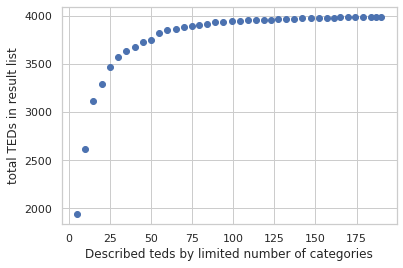

20 categories looks like a good option, 
our set still big enough, about 3300 teds
We will use it in ML part further


In [26]:
# check limit parameter vs set length
plt.scatter(categories_len_list, lengths_list)
plt.ylabel('total TEDs in result list')
plt.xlabel('categories')
plt.xlabel('Described teds by limited number of categories')
plt.show()
print('{} categories looks like a good option, \nour set still big enough, about {} teds'.format(limit, round(lengths_list[categories_len_list.index(limit)],-2)))# limit format
print('We will use it in ML part further')


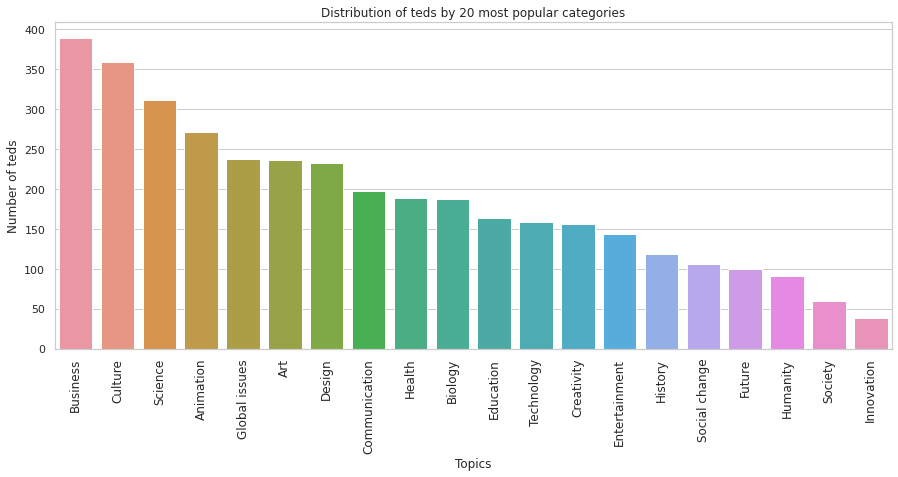

In [27]:
# barplot of popular categories
plt.subplots(figsize=(15,6))
sns.barplot(x=teds_popular_topics.topics_clean.value_counts().index.str.capitalize(),
            y=teds_popular_topics.topics_clean.value_counts().values)
plt.xticks(rotation=90)
# title_construct = 'Distribution of teds by {} most popular categories'.format(limit)
plt.title('Distribution of teds by {} most popular categories'.format(limit))
plt.xlabel('Topics')
plt.ylabel('Number of teds')
plt.xticks(fontsize=12)
plt.show()

In [28]:
# teds_popular_topics #.related_talks[20]

#### 1.3 Explore by events and number of views

In [31]:
# teds.event.unique()

In [32]:
#check unique events by number of views
# teds.groupby(['event'], axis=0).mean().sort_values(by='views', ascending=False)

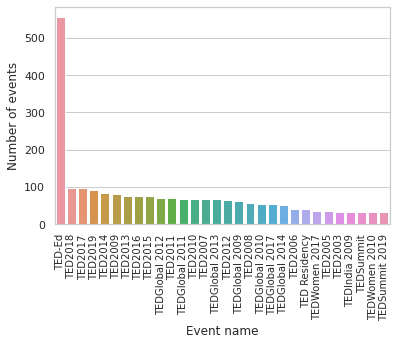

There are 459 events names here, we look on 30 more frequent in set
We have to get rid of years in event names to get more readable data and convert dates to date format


In [33]:
# display events by number (RAW)
events_30 = teds.groupby(['event'], axis=0)['talk_id'].count().sort_values(ascending=False).head(30)
sns.barplot(x=events_30.index, y=events_30.values)
plt.xticks(rotation=90)
plt.xlabel('Event name')
plt.ylabel('Number of events')
plt.xticks(fontsize=10)
plt.show()
print('There are {} events names here, we look on 30 more frequent in set'.format(teds.event.nunique()))
print('We have to get rid of years in event names to get more readable data and convert dates to date format')

In [34]:
# convert date to date format and check nulls
teds.published_date = pd.to_datetime(teds['published_date'], format='%Y-%m-%d')
teds.recorded_date = pd.to_datetime(teds['recorded_date'], format='%Y-%m-%d')
# sort by published date
teds_date = teds.sort_values(by='published_date')
# clean from years and some other repetative names to get more clean categories
teds_date['event_flat'] = teds_date.event.str.replace(r"\d{4}", "", regex=True).str.strip()
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TEDx(.*)?", "TEDx", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TED@(.*)?", "TED@", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TED Salon(.*)?", "TEDSalon", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TEDSalon(.*)?", "TEDSalon", regex=True)
teds_date['event_flat'] = teds_date.event_flat.str.replace(r"^TEDGlobal(.*)?", "TEDGlobal", regex=True)
print('There are {} events names now'.format(teds_date.event_flat.nunique()))
teds_date.head(3)

There are 57 events names now


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,event_flat
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",TED
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",TED
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",TED


In [35]:
#check unique events and sort by dominance
ted_sorted = teds_date.groupby(['event_flat'], axis=0).count().sort_values(by='talk_id', ascending=False)
# len(ted_sorted)
# ted_sorted

In [36]:
limit_num_list = 15
ted_sorted_short = ted_sorted.head(limit_num_list)
ted_sorted_short_list = list(ted_sorted_short.index)
# ted_sorted_short
print(ted_sorted_short_list)

['TED', 'TEDx', 'TED-Ed', 'TEDGlobal', 'TEDWomen', 'TED@', 'TEDSalon', 'TEDMED', 'TEDSummit', 'TED Residency', 'TEDIndia', 'TEDNYC', 'EG', 'TEDYouth', 'TED Talks Live']


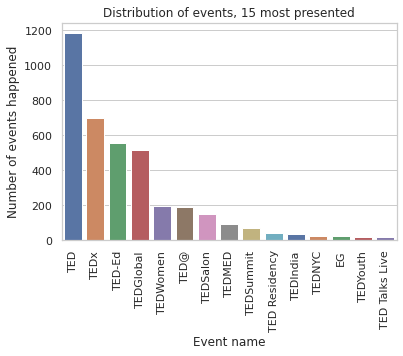

In [37]:
# display events by number
events_limited = teds_date.groupby(['event_flat'], axis=0)['talk_id'].count().sort_values(ascending=False).head(limit_num_list)
# print(events_30)
sns.barplot(x=events_limited.index, y=events_limited.values, palette='deep')
plt.xticks(rotation=90)
plt.title('Distribution of events, 15 most presented')
plt.xlabel('Event name')
plt.ylabel('Number of events happened')
plt.show()
# events_limited
# events_limited.sum()

If a number of views correlates with publishing date, we have to make corrections to properly compare speech from a decade age to a new one

Correlation is -0.06, looks like there is no clear correlation between date and number of views.
So there is no need to do correction of views to compare different years
Median number of views is 1375508


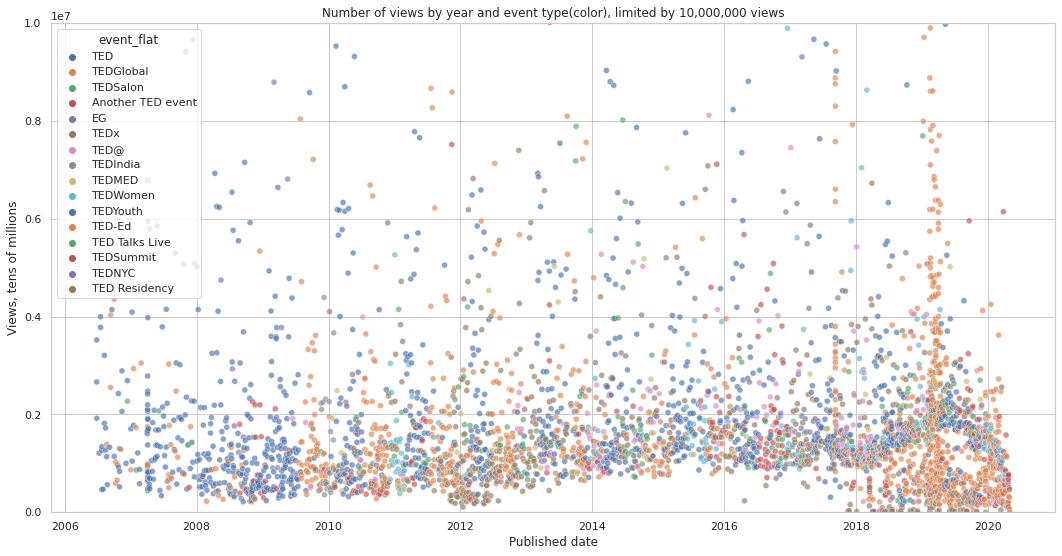

In [38]:
# All rest events will get a name 'Another TED event'
teds_date['event_flat'] = teds_date['event_flat'].apply(lambda x: 'Another TED event' if x not in ted_sorted_short_list else x)
teds_date['published_date'] = pd.to_datetime(teds_date['published_date'])

## check date vs number of views to get general impression of expiration bias
teds_date['published_date_int'] = teds_date['published_date'].apply(lambda x: x.value)
start_date = teds_date['published_date_int'].iloc[0]
teds_date['published_date_int'] = round((teds_date['published_date_int'] - start_date)/10**14,0).astype(int)

# compare views vs duration - correlation
palette='deep'
corr, _ = pearsonr(teds_date.views, teds_date.published_date_int)
corr_r = round(corr, 2)
print('Correlation is ', corr_r, ', looks like there is no clear correlation between date and number of views.', sep='')
print('So there is no need to do correction of views to compare different years')

plt.subplots(figsize=(18,9))
sns.scatterplot(x=teds_date.published_date, y=teds_date.views, hue=teds_date.event_flat, alpha = .65, palette=palette)
plt.title('Number of views by year and event type(color), limited by 10,000,000 views')
plt.ylim(0,10000000)
plt.ylabel('Views, tens of millions')
plt.xlabel('Published date')
print('Median number of views is {}'.format(int(teds.views.median())))
plt.show()
# teds_test

There are some interesting areas on the plot: more views from one category near 2019, some low-views area at 2012. Global trend from 2006 to 2018 is growing of average and minimal views number. From 2018 there are a lot of low-viewed TEDs, it could look like there are just new and will go "up" in near future, but hard to find this trace between 2016-2018 years. \nWe can see the "arc" over 2018-2019. Important to remember that those values are dynamic and even old teds will get more views in future


We could understand this data better by another plot, grouped by event in more interactive way

In [39]:
# teds_date_cropped.event_flat.nunique() # 16
# sns.color_palette('deep', teds_date_cropped.event_flat.nunique())

In [40]:
# prepare df and colors #colors get wrong number
teds_date_cropped = teds_date[teds_date.views <= 10000000]
clr_deep = list(sns.color_palette('deep', teds_date_cropped.event_flat.nunique()))
# convert rgb to hex
import matplotlib
hex_clr = [matplotlib.colors.to_hex(i) for i in clr_deep] 

In [41]:
# same data with plotly, more interactive
fig = px.scatter(teds_date_cropped,
                 x='published_date',
                 y='views',
                 color='event_flat',
                 hover_data = ['title'],
                 color_discrete_sequence=hex_clr,
                 labels={
                     'published_date': 'Published date',
                     'views': 'Number of views',
                     'event_flat': 'Event name',
                     'title': 'Title'
                 },
                title='Number of views by year and event name (by color), limited by 10,000,000 views',
                width=1000, height=650
                )
fig.show()
print('Here we can see that more views in 2019 it is TED-Ed, 2012 low-viewed area is mostly TEDx')

Here we can see that more views in 2019 it is TED-Ed, 2012 low-viewed area is mostly TEDx


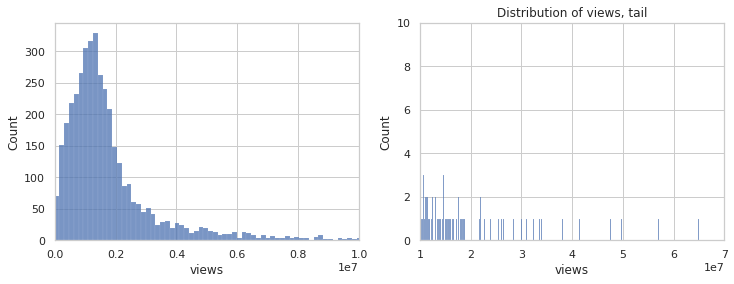

There are only 89 TEDs with more than 10000000 views in all 4005 TEDs


In [42]:
# move it or remove it ============================
# Plot histogramm of views. 0 to 10,000,000 views and tail (10,000,000 to 70,000,000)
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

fig, ax = plt.subplots(1, 2,figsize=(12,4))
#create plots
plt.title('Distribution of views')

g = sns.histplot(teds.views, ax=ax[0])
g.set(xlim=(0,10000000))

g = sns.histplot(teds.views, ax=ax[1])
g.set(xlim=(10000000,70000000), ylim=(0,10))
plt.title('Distribution of views, tail')
plt.show()
# check teds with more than 15,000,000 views
limit_number = 10000000
teds_super = teds[teds.views > limit_number]
teds_normal = teds[teds.views <= limit_number]
print('There are only',len(teds_super), 'TEDs with more than', limit_number, 'views', 'in all',len(teds), 'TEDs')

In [43]:
# maybe start from this ===============================
# or something like this - 30 first from sorted by views
teds_sorted = teds_date.sort_values(by='views', ascending=False).reset_index()
print('20 more viewed teds:')
teds_sorted.title.head(20)

20 more viewed teds:


0                           Do schools kill creativity?
1              Your body language may shape who you are
2     This is what happens when you reply to spam email
3                      How great leaders inspire action
4                            The power of vulnerability
5            How to speak so that people want to listen
6            Inside the mind of a master procrastinator
7     Looks aren't everything. Believe me, I'm a model.
8                        My philosophy for a happy life
9                    The next outbreak? We're not ready
10    What makes a good life? Lessons from the longe...
11               10 things you didn't know about orgasm
12                   Why people believe they can't draw
13                                   How to spot a liar
14                            The orchestra in my mouth
15                              The art of misdirection
16                                 My stroke of insight
17                              The power of int

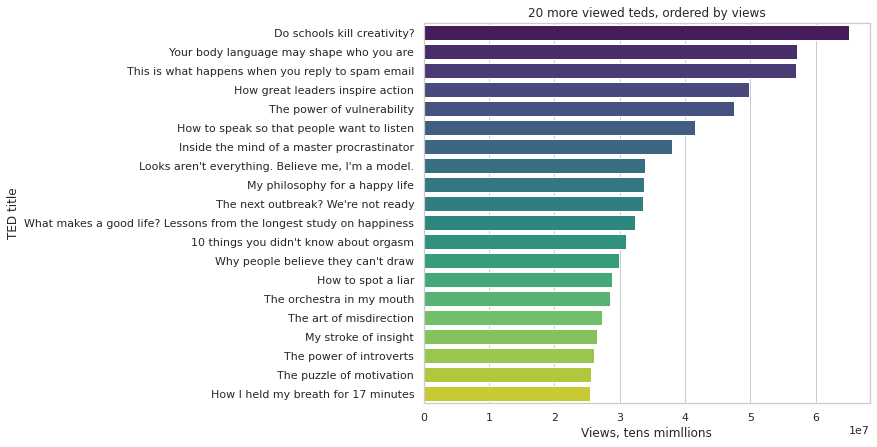

In [44]:
plt.subplots(figsize=(8,7))
sns.barplot(data=teds_sorted.head(20), x='views', y='title', palette='viridis')

# plt.xticks(rotation=0)
plt.xlabel('Views')
plt.ylabel('TED title')
plt.xlabel('Views, tens mimllions')
plt.title('20 more viewed teds, ordered by views')
plt.xticks(fontsize=11)
plt.show()

In [45]:
teds_sorted.event_flat.unique()

array(['TED', 'TEDGlobal', 'TEDx', 'TEDMED', 'TEDSummit',
       'Another TED event', 'TEDIndia', 'TED-Ed', 'TEDSalon', 'TEDWomen',
       'TED Talks Live', 'TEDNYC', 'EG', 'TED@', 'TEDYouth',
       'TED Residency'], dtype=object)

In [46]:
# prepare data and palette
views_by_events_median = teds_sorted.groupby('event_flat')['views'].median().sort_values(ascending=False)
comments_by_events_median = teds_sorted.groupby('event_flat')['comments'].median().sort_values(ascending=False)
clr_husl = list(sns.husl_palette(n_colors=len(views_by_events_median.index), h=0.01, s=0.9, l=0.65, as_cmap=False))

In [47]:
# function to remap colors by events lists
def remap_clr_list_by_two_lists(original_list, second_list, clr_list):
    enum_original_list = list(enumerate(original_list))
    new_indexes = [[j[0] for j in enum_original_list if i in j] for i in second_list]
    new_indexes = [item for items in new_indexes for item in items]
    second_list_clr = [clr_list[x] for x in new_indexes]
    return second_list_clr, new_indexes

In [48]:
# comments_by_events_median.index

In [49]:
# remap events to order synchronically
# clr_husl = list(sns.husl_palette(n_colors=len(views_by_events_median.index), h=0.01, s=0.9, l=0.65, as_cmap=False))
_, new_indexes = remap_clr_list_by_two_lists(comments_by_events_median.index, views_by_events_median.index, clr_husl)

new_indexes_ser = pd.Series(new_indexes)
views_by_events_median_reordered = pd.DataFrame(views_by_events_median).reset_index()
views_by_events_median_reordered['new_index'] = new_indexes_ser
views_by_events_median_reordered.sort_values(by='new_index', inplace=True)
views_by_events_median_reordered.drop(['new_index'], axis=1, inplace=True)
views_by_events_median_reordered.set_index('event_flat', inplace=True)
views_by_events_median_reordered = views_by_events_median_reordered.squeeze()
# views_by_events_median_reordered

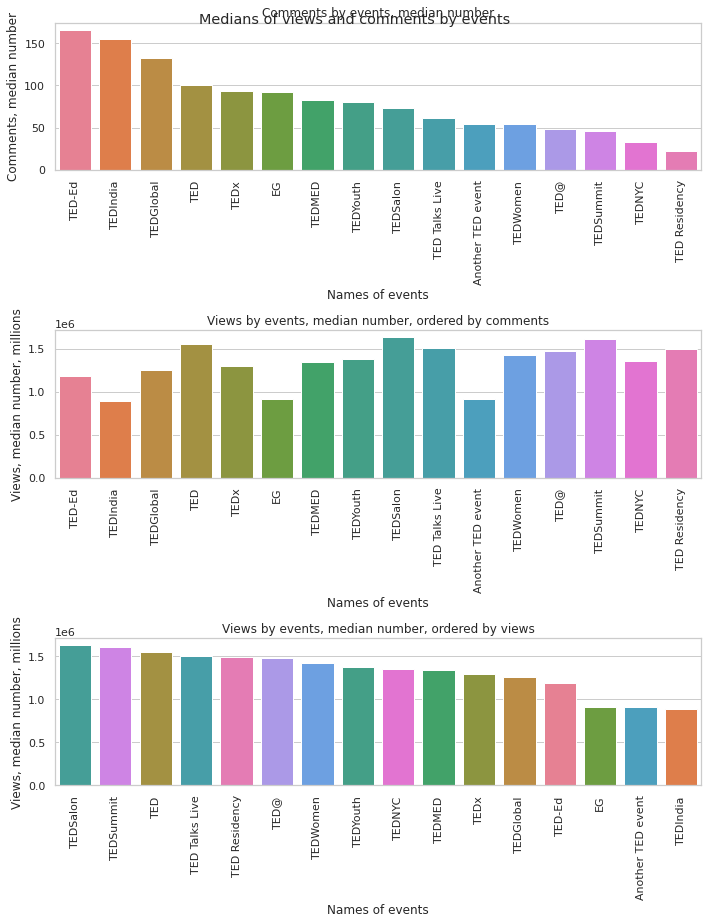

In [53]:
# Show views and comments medians by events
fig, axs = plt.subplots(3, 1, figsize=(10,13))
fig.suptitle('Medians of views and comments by events')

palette=clr_husl
sns.barplot(x = comments_by_events_median.index, y = comments_by_events_median, ax=axs[0], palette=palette)


sns.barplot(x=views_by_events_median_reordered.index, y=views_by_events_median_reordered, ax=axs[1], palette=palette)

# remap color palette
palette, _ = remap_clr_list_by_two_lists(comments_by_events_median.index, views_by_events_median.index, clr_husl)

sns.barplot(x=views_by_events_median.index, y=views_by_events_median, ax=axs[2], palette=palette)
plt.sca(axs[0])
plt.xticks(rotation=90)
plt.sca(axs[1])
plt.xticks(rotation=90)
plt.sca(axs[2])
plt.xticks(rotation=90)
axs[0].title.set_text('Comments by events, median number')
axs[1].title.set_text('Views by events, median number, ordered by comments')
axs[2].title.set_text('Views by events, median number, ordered by views')
xlabel = 'Names of events'
axs[0].set_xlabel(xlabel)
axs[1].set_xlabel(xlabel)
axs[2].set_xlabel(xlabel)
axs[0].set_ylabel('Comments, median number')
axs[1].set_ylabel('Views, median number, millions')
axs[2].set_ylabel('Views, median number, millions')
plt.tight_layout()
plt.show()

write some text here about those graphs

#### 2.1 Compare views vs duration, duration distribution and checking some hypotesys

Distribution is highly skewed right

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



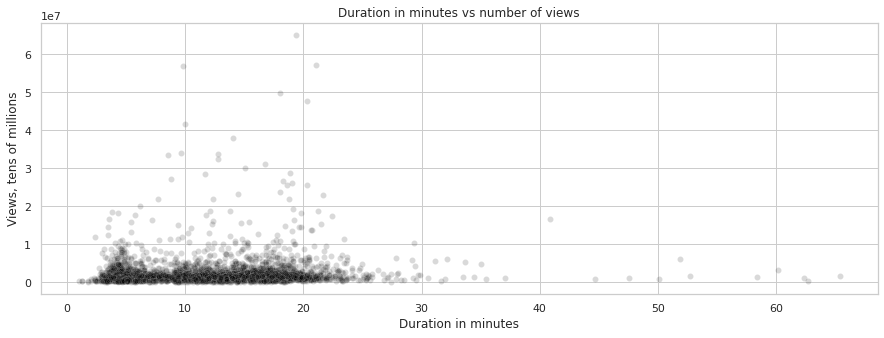

Correlation coefficient is 0.07, too low to be something significant


In [54]:
# setting table with duration in minutes
teds_date_cropped['duration_min'] = teds_date_cropped['duration'].div(60)
# compare views vs duration 
plt.subplots(figsize=(15,5))
sns.scatterplot(y='views', x=teds.duration.div(60), data=teds, alpha=.15, color='0')
plt.title('Duration in minutes vs number of views')
plt.ylabel('Views, tens of millions')
plt.xlabel('Duration in minutes')
plt.show()
# compare views vs duration - correlation
corr, _ = pearsonr(teds.views, teds.duration)
corr_r = round(corr, 2)
print('Correlation coefficient is ', corr_r, ', too low to be something significant', sep='')
# no correlation

Interesting, that distribution doesn't look as a normal even without outliers, there are at least two peaks of view's number: on 5 minutes and near 15 minutes, maybe it's about event format. Let's plot it by events and without outliers: drop everything more than 30 minutes long and more 10,000,000 views

In [55]:
# check it with plotly
# teds.duration/60
teds_cropped_30min = teds_date_cropped[teds_date_cropped.duration_min <= 30]
teds_cropped_30min_10mln = teds_cropped_30min[teds_cropped_30min.views <= 10000000]
# palette = px.colors.cyclical.HSV
# fig = px.colors.cyclical.swatches_continuous()
fig = px.scatter(teds_cropped_30min_10mln,
                 y='views',
                 x='duration_min',
                 color='event_flat',
                 hover_data = ['title'],
                 color_discrete_sequence=hex_clr,
                 labels={
                     'views': 'Number of views',
                     'duration_min': 'Duration in minutes',
                     'event_flat': 'Event name',
                     'title': 'Title'
                 },
                title='Duration in minutes vs number of views, limited by 10,000,000 views and 30 minutes length',
                width=1000, height=650
                ).update_layout(yaxis_title='Number of views', xaxis_title='Duration in minutes'
                )
fig.show()

Here we can see again how TED-Ed stands out

Let's check a histogram of durations distridution with and without TED-Ed event



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



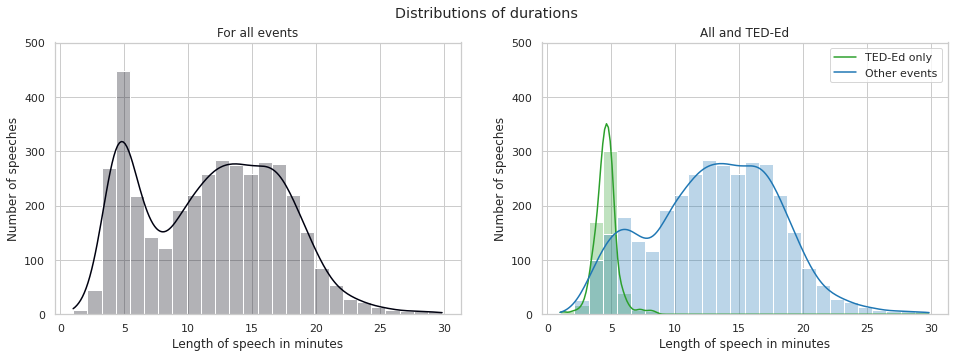

In [56]:
# plot duration distributions
fig, axs = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Distributions of durations')
bins = 26

sns.histplot(teds_cropped_30min.duration_min, bins=bins, ax=axs[0], color='#000110', alpha = .3, kde = True)
teds_cropped_30min['label_by_teded'] = teds_cropped_30min.event_flat.apply(lambda x: 'TED-Ed' if x == 'TED-Ed' else 'Another TED')

# teds_cropped_30min_noTedEd = teds_cropped_30min[teds_cropped_30min.event_flat != 'TED-Ed']
# sns.histplot(teds_cropped_30min_noTedEd.duration_min, bins=bins, ax=axs[1], color='#488dc0', alpha = .4, kde = True)

palette = ['tab:blue', 'tab:green']
# teds_cropped_30min_TedEd = teds_cropped_30min[teds_cropped_30min.event_flat == 'TED-Ed']
sns.histplot(data=teds_cropped_30min, x='duration_min', bins=bins, ax=axs[1], color=['#488dc0'], alpha = .3, kde = True, palette=palette, hue='label_by_teded')#, hue='event_flat')

ylim = 500
axs[0].set_ylim(0,ylim)
axs[1].set_ylim(0,ylim)
axs[1].legend(['TED-Ed only', 'Other events'])# 
axs[0].title.set_text('For all events')
axs[1].title.set_text('All and TED-Ed')
axs[0].set_xlabel('Length of speech in minutes')
axs[1].set_xlabel('Length of speech in minutes')
axs[0].set_ylabel('Number of speeches')
axs[1].set_ylabel('Number of speeches')

plt.show()

For sure we observe a special format of TED-Ed events - about 5 minutes
Let's explore a distribution of durations in rest events on the next kde graph

In [57]:
# teds_cropped_30min.event_flat.unique()

In [58]:
# Rearrange events for KDEplot
def send_item_to_top(lst, item):
        lst.remove(item)
        lst.insert(0, item)
        return lst
    
events_list_orig = list(teds_cropped_30min.event_flat.unique())
# print(events_list_orig)
events_list = send_item_to_top(events_list_orig, 'TED-Ed')
events_list = send_item_to_top(events_list, 'TEDYouth')    
events_list = send_item_to_top(events_list, 'TED Residency')
# events_list
clr_deep_remapped, new_indexes_to_show = remap_clr_list_by_two_lists(list(teds_cropped_30min.event_flat.unique()), events_list, clr_deep)


In [59]:
# new_indexes_to_show

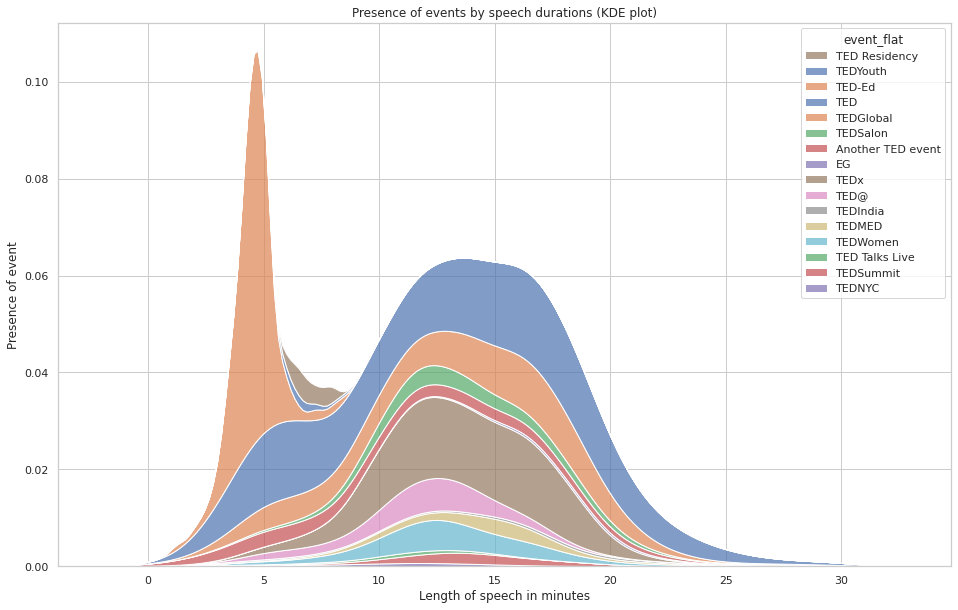

In [72]:
plt.subplots(figsize=(16,10))
palette = clr_deep_remapped
# teds_cropped_30min.rename(columns = {'event_flat':'Events'}, inplace = True)
# teds_cropped_30min.rename(columns = {'Events':'event_flat'}, inplace = True)

sns.kdeplot(data=teds_cropped_30min,
             x='duration_min',
             multiple='stack',
             alpha = .7,
             lw=1,
             hue='event_flat',
             palette=palette,
             hue_order=events_list,
             )
plt.xlabel('Length of speech in minutes')
plt.ylabel('Presence of event')
plt.title('Presence of events by speech durations (KDE plot)')
# plt.legend(labels=labels[:-1], title = 'Events')
plt.show()
# events_list

We clearly observe predominance of five-minutes long speeches in TED-Ed and couple more small events.

Rest events have a normal distribution mostly with small inflations at 5-7 minutes durations




** **   
   
   
   

#### 2.2 Are most popular speeches from most popular topics?
Number of speech views and comments will be a marker of it's popularity
We will check our hypotesis by calculation of correlation coefficient between rating of speech topic and views, comments. 
Significant negative correlation there will approve our hypotesis. 
Oterway the null hypotesis is right - there is no strong connection between topic and popularity of some TED speech

In [61]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [73]:
# get large topic list to check connection between speech rating an
limit = 100
teds_popular_topics_100 = get_teds_popular_topics(teds, topics_list_flat_df, limit);

3995 total TEDs in result list
99 categories

Number of teds by categories: 
(by limited popular topics list)
business          297
culture           229
animation         193
art               184
activism          165
                 ... 
mind                3
world cultures      2
motivation          2
visualizations      2
potential           1
Name: topics_clean, Length: 99, dtype: int64


3741
3128


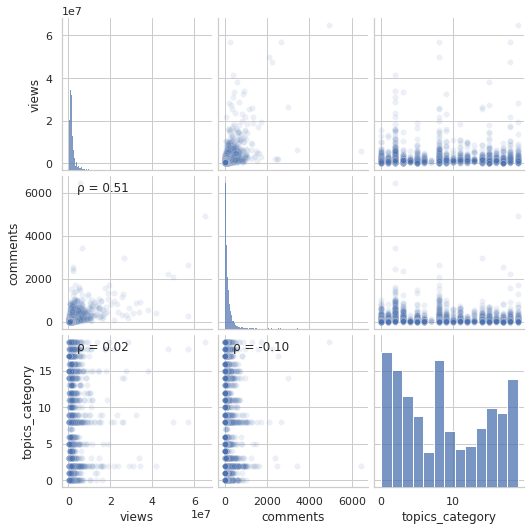

In [74]:
teds_num = teds_popular_topics[['views', 'comments', 'topics_clean', 'topics_category']]
print(len(teds_num))
teds_num_clean = teds_num.dropna()
print(len(teds_num_clean))
# correlation pairplot check
# g = sns.pairplot(teds_num_clean, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
g = sns.pairplot(teds_num_clean, plot_kws={'alpha':0.1})
g.map_lower(corrfunc)
plt.show()

There is a correlation between number of views and number of comments, make sense, it's our marker for popular speeches.
There is no strong correlation to approve our hypotesis - there is no strong connection between topic and popularity of some TED speech

In [64]:
# teds_num

In [65]:
teds_num_clean = teds_num.dropna()
teds_num_clean = teds_num_clean[teds_num_clean.comments < 500]
teds_num_clean['commets_median'] = teds_num_clean.groupby(['topics_clean']).comments.transform('median')
teds_num_clean = teds_num_clean.sort_values('commets_median', ascending=False)

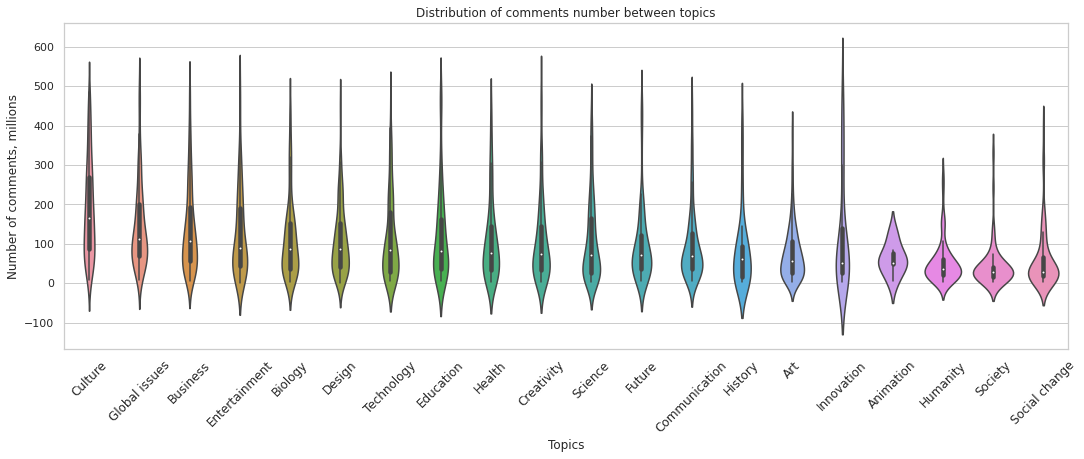

In [66]:
# compare views between topics
plt.subplots(figsize=(18,6))
sns.violinplot(data=teds_num_clean, x=teds_num_clean.topics_clean.str.capitalize(), y='comments')
plt.xticks(fontsize=12, rotation=45)
plt.title('Distribution of comments number between topics')
plt.xlabel('Topics')
plt.ylabel('Number of comments, millions')
plt.show()

## 3. ML part

3.1 Predict topic by transcript

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

We will try to predict topic of TED speech by it's trancript, will use short list of topics - 15

In [89]:
print('Popular topics after simplification:\n', teds_popular_topics['topics_clean'].unique())
print(len(teds_popular_topics), 'TEDs included')

Popular topics after simplification:
 ['culture' 'global issues' 'entertainment' 'business' 'creativity'
 'design' 'biology' 'health' 'future' 'art' 'science' 'technology'
 'communication' 'education' 'history' 'humanity' 'innovation'
 'social change' 'animation' 'society']
3741 TEDs included


3741

In [105]:
# split set to test and train
X = teds_popular_topics['transcript'] + teds_popular_topics['description']
# X = teds_popular_topics['description']

Y = np.array(teds_popular_topics['topics_category'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [106]:
# # split set to test and train - _short for test
# teds_popular_topics_short = teds_popular_topics.head(100) # for tests
# from sklearn.model_selection import train_test_split
# X = teds_popular_topics_short['transcript']
# # X = teds_popular_topics['description']

# Y = np.array(teds_popular_topics_short['topics_category'])
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [107]:
print(len(Y_train), '- train set')
print(len(Y_test), '- test set')


2992 - train set
749 - test set


In [108]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, Y_train)

In [109]:
# Performance of NB Classifier
import numpy as np
predicted = text_clf.predict(X_test)
# print(predicted, Y_test)
# show_predictions_vs_targets(predicted, Y_test)
NB_mean_true = np.mean(predicted == Y_test)*100
print(NB_mean_true, '- not too much...')

15.220293724966622 - not too much...


In [110]:
# Training Support Vector Machines - SVM and calculating its performance
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, random_state=42))])

text_clf_svm = text_clf_svm.fit(X_train, Y_train)
predicted_svm = text_clf_svm.predict(X_test)
SVM_mean_true = np.mean(predicted_svm == Y_test)*100
SVM_mean_true

38.31775700934579

In [111]:
#@title
# Stemming Code
import nltk
nltk.download('popular') # download in once

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
                             ('tfidf', TfidfTransformer()), 
                              ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=20, random_state=42))])
text_mnb_stemmed = text_mnb_stemmed.fit(X_train, Y_train)

predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)
SVM_stemmed_mean_true = np.mean(predicted_mnb_stemmed == Y_test)*100
SVM_stemmed_mean_true

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

36.18157543391188

In [112]:
# compare models
print('Performance of SVM model slightly better without stemming and significantly better than NB')
print('Right answers:')
print('Naive Bayes: {0:.2f}%'.format(NB_mean_true))
print('SVM stemmed: {0:.2f}%'.format(SVM_stemmed_mean_true))
print('SVM:         {0:.2f}%'.format(SVM_mean_true))

Performance of SVM model slightly better without stemming and significantly better than NB
Right answers:
Naive Bayes: 15.22%
SVM stemmed: 36.18%
SVM:         38.32%


38% is not so much, but remember - we choose from 15 options, so random guessing give us less than 7%

anyway there is a lot to improve